In [ ]:
'''In this unit we will discuss about linear regression and using this model we will predict the quality of wine and in recitation, we will discuss 
about the movie named MoneyBall, using statistics and analytics a team of baseball named Oakland A won a championship'''

In [ ]:
'''Linear Regression is a very powerful method to analyze and make predictions and apply it. '''
'''Boredeaux wine'''
    '''Large differences in price and quality between years, although wine is produced in a similar way'''
    '''Meant to be aged, so hard to tell if wine will be good when it is on the market'''
    '''Expert tasters predict which ones will be good'''
    '''Can analysis be used to come up with a different system for judging wine'''
'''Building a model'''
    '''Scientist used a method called linear regression'''
        '''Predicts an outcome variable, or dependent variable'''
        '''predicts using a set of independent variable'''
    '''Dependent variable:->Typical price in 1990-1991 wine auctions'''
    '''Independent Variable:->'''
        '''Age'''
        '''Weather'''
            '''AVerage growing Season Temperature'''
            '''Harvest rain'''
            '''Winter Rain'''
        
    

In [ ]:
'''One Variable Linear Regression'''
    '''The goal of linear regression is to create a predictive line through the data. There are many different lines 
    that could be drawn to predict wine price using average gross season temperature.'''
    '''y^i=B0+B1x^i+E^i'''
        '''y^i->dependent Variable(wine price) for the ith observation'''
        '''x^i->independent variable(temperature) for the ith observation'''
        '''E^i->error term for ith observation'''
        '''B0->intercept coefficient'''
        '''B1->regression coefficient'''
    '''The best model has the smallest error terms'''
    '''Sum of Squared errors'''
        '''SSE hard to interept'''
            '''Depends on N'''
            '''units are hard to understand'''
        '''ROOT_MEAN_SQUARE ERROR(RMSE)'''
            '''RMSE=(SSE/N)^1/2'''
        '''Normalized by N, Units of dependent Variable'''
    '''R-SQUARE'''
        '''Compare the best model to the best line model'''
        '''The baseline model does not use any variables'''
        '''Predicts same outcome(Price) regardless of the independent variable(temperature)'''
        
'''SSE->Sum of squared error of predicted line
SST->sum of squared error of base line
'''    
'''R^2=1-(SSE/SST)'''
'''Interpreting R-SQUARE'''
    '''R-SQUARE captures value added from using a model'''
        '''R-SQUARE=0:means no improvement over base line'''
        '''R-SQUARE=1:means a perfect predictive model'''
    '''unitless and universally interpretable'''
        '''can still be hard to compare between problems'''
        '''good models for easy problems will have R-SQUARE equivalent to 1'''
        '''good models for hard problems will have R-SQUARE equivalent to 0'''
    

In [1]:
'''Multivariate Linear Regression'''
    '''So far we have only used the Average Growing Season Temperature to predict wine prices'''
    '''Many different independent variables ould be used'''
        '''AVerage growing season temperature'''
        '''harvest rain'''
        '''winter rain'''
        '''age of wine'''
        '''population of france'''
    '''using each variable on its own and having different R-SQUARE'''
    '''Multiple Linear Regression allows us to use all of these variables to improve our predictive ability'''
    '''Adding more variables can improve the model'''
    '''Not all available variables should be used'''
        '''Each new variable requires more data'''
        '''causes overfitting:High R-SQUARE on data used to create model, but bad performance on unsenn data'''
    

IndentationError: unexpected indent (<ipython-input-1-dbd3a2816808>, line 2)

In [67]:
import pandas as pd
import numpy as np
import os
import statistics
import statsmodels.formula.api as sm
train=pd.read_csv('./wine.csv')#reading a data set
train.info()#structure of data set
train.describe()#summary of data set
result=sm.ols(formula="Price ~ AGST",data=train).fit()#linear regression function using statsmodels using price as dependent variable and AGST as independent variable
result.summary()
#Lets see our summary'''
#The estimate column gives estimate of beta values for our model, B0 is -3.4 and B1 is 0.63'''
#R-SQUARE is 0.435'''
    #'''Adjusted R-Square is 0.410'''
    #'''Multiple R-SQUARE always increase if you add more independent variables, but adjusted R-SQUARE will decrease if you add up an independent variable'
result.fittedvalues#estimated or predictive values
result.resid#calculating the residuals3
SSE=sum(result.resid**2)#calculating the SUm of Squared Errors
result1=sm.ols(formula="Price ~ AGST+HarvestRain",data=train).fit()#linear regression function using statmodels using price as dependent variable and AGST+HArvestRain as independent variable
result1.summary()
SSE2=sum(result1.resid**2)#better than forst model i.e 2.97
result3=sm.ols(formula="Price ~ AGST+HarvestRain+WinterRain+Age+FrancePop",data=train).fit()#linear regression function using statsmodel using Price as dependent variable and all other variables as independent variable
result3.summary()#as you can see the adjusted and multiple R-SQUARED has been increased
SSE3=sum(result3.resid**2)#better than previous results
result3.summary()#the independent variables are listed on the second table of the output i.e HarvestRain, AGST etc.Column next to it shows the coefficient of the intercept and each for the independent variables in our model
#The remaining columns shows if a variable should be included in the model or if its coefficient is significantly different from 0
#A coefficient of 0 means the vaue doesn't change our prediction .
#the std. error column gives a measure of how much the coefficients is likely to vary from the estimated value
#The t-value is the estimate divided by the standard error, it will be negative if the estimate is negative and positive for positive. The larger is the absolute value of t, more likely coefficient is to be significant
#the last column of numbers gives how plausible it is that coefficient is actually 0, less plausible means less probability. We want independent variables with small values in this column
#***->0 prob. value
#**->between 0.001 and 0.01 prob. value
#*->between 0.01 and 0.05 prob. value
#. ->between 0.05 and 0.10
# Except for these range variables, they are not significant and not useful for our model
#As you can see AGe and FrancePop are insignificant for our model
result4=sm.ols(formula="Price ~ AGST+HarvestRain+WinterRain+Age",data=train).fit()
result4.summary()#as you can see the values of adjusted R-Square has been increased so it is strong as compared to previous model
#but you also can see, in this new model or say result, Age has become significant. This is because of multicollinearity.Age and FrancePop are highly correlated



#CORRELATION
    #A measure of the linear relationship between variables, like we compute pearson R in statistics
        #+1 corresponds to perfect positive linear relationship
        #0 corresponds to no linear relationship
        #-1 corresponds to perfect negative linear relationship
cor1=np.corrcoef(train.WinterRain,train.Price)[0,1]#finding the correlation between winterrain and price
cor2=np.corrcoef(train.Age,train.FrancePop)[0,1]#finding the correlation between age and Francepop and as you can see they are highly correlated(negative) 
cor3=train.corr()#correlation of the whole variables of the given data set


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
Year           25 non-null int64
Price          25 non-null float64
WinterRain     25 non-null int64
AGST           25 non-null float64
HarvestRain    25 non-null int64
Age            25 non-null int64
FrancePop      25 non-null float64
dtypes: float64(3), int64(4)
memory usage: 1.4 KB


,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,-0.447768,0.016970,-0.246916,0.028009,-1.000000,0.994485
Price,-0.447768,1.000000,0.136651,0.659563,-0.563322,0.447768,-0.466862
WinterRain,0.016970,0.136651,1.000000,-0.321091,-0.275441,-0.016970,-0.001622
AGST,-0.246916,0.659563,-0.321091,1.000000,-0.064496,0.246916,-0.259162
HarvestRain,0.028009,-0.563322,-0.275441,-0.064496,1.000000,-0.028009,0.041264
Age,-1.000000,0.447768,-0.016970,0.246916,-0.028009,1.000000,-0.994485
FrancePop,0.994485,-0.466862,-0.001622,-0.259162,0.041264,-0.994485,1.000000


In [90]:
#Predictive Ability
    #Our wine model had a value of R-SQUARE 0.83.
    #tells us our accuracy on the data that we used to build the model, often called as training data.
    #but what about the new data?, often called as test data.
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np
import statistics
import os
test=pd.read_csv('./wine_test.csv')
test.info()#structure of new data set
prediction=result4.predict(test)#first data pojnt we predict 6.76 and second for 6.68, we can quantify this calculating the R-SQUARE
SSEnew=sum((test.Price-prediction)**2)#sum of squared errors prediction
SST=sum((test.Price-statistics.mean(train.Price))**2)#original r square or say baseline model
rsquare=1-SSEnew/SST#calculating residuals of new test set and comes out preety good, this is basically the accuracy iof our model
#Better model R^2 does not necessarily mean better test set R^2
#Need more data to be conclusive
#out of sample R^2 can be negative
#Two data points in your test set is not good enough to know about the accuracy of oour model
#test set R^2 can be negative but not on train set


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
Year           2 non-null int64
Price          2 non-null float64
WinterRain     2 non-null int64
AGST           2 non-null float64
HarvestRain    2 non-null int64
Age            2 non-null int64
FrancePop      2 non-null float64
dtypes: float64(3), int64(4)
memory usage: 184.0 bytes


0.7944277602631964

In [ ]:

'''Story of Moneyball'''
        '''Moneyball tells the story of OAKLAND A's in 2002'''
        '''One of the poorest teams in baseball'''
            '''New ownership and budget cuts in 1995'''
        '''But they were improving'''
        '''The problem'''
            '''Rich teams can afford the all-star players'''
            '''How do the poor teams compete'''
        '''There were three major teams, NewYork Yankees, RedFox, Oakland A'''
            '''NewYork Yankees spent about 90$million and won 100 games'''
            '''Red Fox spend around $80million and won about 90 games'''
            '''Oakland A's spend around $30million and won about 90 games'''.
            '''RedFox and NewYork Yankees can afford all star players'''
            '''Oakland A's cant afford the all stars, but they are still make to playoffs. how?'''
            '''They take a quantitative approach and find undervalued players'''
            '''The Oakland A's is selecting players on their statistics, not their looks'''
'''The goal of a baseball team is to make a playoffs'''
'''The oakland A's approach was to get playoffs by using analytics'''
'''We will use linear regression to oredict how many games a tea will win using the difference between runs scored and runs allowed'''
'''We will then use linear regression again to predict the number of runs a team will allow using fielding and pitching statistics'''
'''we will start b7 figuring out how many games a team needs to get it to playoffs'''
'''If a team won 95 games or more, will likely to made it to playoffs'''
'''Winning 95 games'''
    '''How does a team win games?'''
    '''They score more runs than their opponent'''
    '''But how many more?'''
    '''The A's calculated that they need to score 135 more runs that they allowed during the regular season to expect to win 95 games'''
    '''Let's verify this using linear regression''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
W               1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 330 to 1231
Data columns (total 15 columns):
Team            902 non-null object
League          902 non-null object
Year            902 non-null int64
RS              902 non-null int64
RA              902 non-nul

/home/deepu8489/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     6651.
Date:                Sun, 24 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:31:49   Log-Likelihood:                -2515.5
No. Observations:                 902   AIC:                             5035.
Df Residuals:                     900   BIC:                             5045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.8814      0.131    616.675      0.000      80.624      81.139
RD             0.1058      0.001     81.554      0.000       0.103       0.108
==============================================================================
Omnibus:                        5.788   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.736
Skew:                          -0.195   Prob(JB):                       0.0568
Kurtosis:                       3.033   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

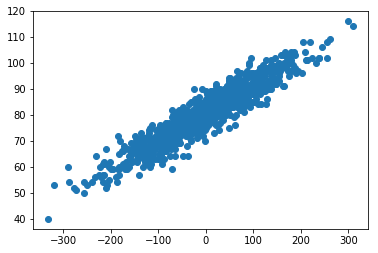

In [101]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import statsmodels.formula.api as sm
import statistics
train=pd.read_csv('./baseball.csv')#loading a baseball data set
train.describe()#summary of the baseball data set
train.info()#structure of the baseball data set
moneyball=train[train.Year<2002]#we are using the data used by paul depodesta, statistician hired by the owner of oakland A's owner and data was upto the year 2001
moneyball.info()
#Now we want linear regression equation to predict wins using the difference between the runs scored and runs allowed
moneyball['RD']=moneyball.RS-moneyball.RA#we have created a new variable name RD(Run Difference) and it is equal to Run scored and runs allowed
moneyball.info()
plt.scatter(moneyball.RD,moneyball.W)#as you can see there's a strong linear relationship between Run difference and wins
winReg=sm.ols(formula="W ~ RD",data=moneyball).fit()#check the mathematically lineaar relationship between run difference and wins
winReg.summary()#as you can see the r square value is quite high
#as here we can see coefficients are 80.8814 which B0, 0.105766 which is B1. Now how does the statstician calculated the wins required. 
#Y=B0+B1x
#W=80.8814+0.1058(RD)
#W>=95
#so->   RD>=133.4

In [107]:
#Scoring Runs
    #How does a team score more runs?
    #The A's discovered the two baseball statistics were significantly more important than anything else
        #On-Base Percentage(OBP)
            #Percentage of time a player gets on base(including walks)
        #Slugging Percentage(SLG)
            #How far a player gets around the bases on his turn(measures power)
    #Most teams focused on Batting Average(BA)
        #getting on base by hitting the ball
    #The A's claimed that:
        #OBP was most important
        #SLG was important
        #BA was overvalued
    #Can we use linear regression to verify which baseball stats are more important to predict runs?
import pandas as pd
import statistics
import statsmodels.formula.api as sm
import os
import numpy as np
import matplotlib.pyplot as plt
moneyball.info()
runsReg=sm.ols(formula="RS ~  OBP+SLG+BA",data=moneyball).fit()#we wish to see if the runs scored is directly connected to onbase percentage, slugging percenatge and batting average
runsReg.summary()#as you can see the RSQuare is quite high of this model and all our variables are significannt, and our coefficents are negative, that means a team with lower batting average will score more runs
#and these three statistics are highly correlated, let's see by removing batting average
runsReg=sm.ols(formula="RS ~ OBP+SLG",data=moneyball).fit()
runsReg.summary()#we can see, our variables are still significant and RSQUARE is still high
#BY THIS WE CANY VERIFY THAT BATTING PERCENTAGE IS OVERVALUED

#using our regression model we would like to predict before the season starts, how many games the 2002 oakland A's will win
#The models for runs use team statistics
#how many runs team will score, how many runs they will allow, as these modelmuse statistics
#we can't predict the actual score but using statistics we can estimate thi thing using past players data
#this approach assumes that past performance has been related to future performance. We can estimate 2002 performace by going through 2001 perfromance\


<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 330 to 1231
Data columns (total 16 columns):
Team            902 non-null object
League          902 non-null object
Year            902 non-null int64
RS              902 non-null int64
RA              902 non-null int64
W               902 non-null int64
OBP             902 non-null float64
SLG             902 non-null float64
BA              902 non-null float64
Playoffs        902 non-null int64
RankSeason      154 non-null float64
RankPlayoffs    154 non-null float64
G               902 non-null int64
OOBP            90 non-null float64
OSLG            90 non-null float64
RD              902 non-null int64
dtypes: float64(7), int64(7), object(2)
memory usage: 119.8+ KB


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     5934.
Date:                Sun, 24 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:19:13   Log-Likelihood:                -4174.2
No. Observations:                 902   AIC:                             8354.
Df Residuals:                     899   BIC:                             8369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -804.6271     18.921    -42.526      0.000    -841.761    -767.493
OBP         2737.7680     90.685     30.190      0.000    2559.790    2915.746
SLG         1584.9086     42.156     37.597      0.000    1502.174    1667.643
==============================================================================
Omnibus:                        3.099   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                3.106
Skew:                           0.143   Prob(JB):                        0.212
Kurtosis:                       2.972   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''WELCOME TO RECITATION, IN THIS WE WILL DISCUSS ABOUT AN NBA(NATIONAL BASKETBALL ASSOCIATION) DATASET'''

SyntaxError: invalid syntax (<unknown>, line 1)

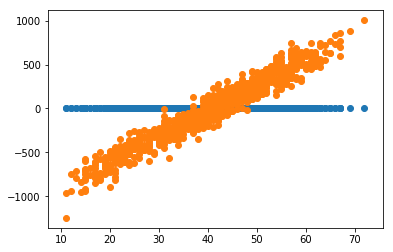

In [130]:
import pandas as pd
import statistics
import statsmodels.formula.api as sm
import numpy as np
import os
import matplotlib.pyplot as plt
train=pd.read_csv('./NBA_train.csv')
train.head()#first 5 rows of the given NBA data
a=plt.scatter(train.W,train.Playoffs)#relation finding by a plot and as you can see  number of more wins, as number of more playoffs
pd.crosstab(train.W.dropna(),train.Playoffs.dropna())#same thing we did by creating a table of these two variables
#can we use the difference between points scored and points allowed throughout regular season in order to predict the number of games that a team will win?
train['ptsdiff']=train.PTS-train.oppPTS
plt.scatter(train.W,train.ptsdiff)#as we can see there is a positive strong linear relationshio between these two variables
result=sm.ols(formula="W ~ ptsdiff",data=train).fit()#lets see thesee relation by a linear regression model and predict the values
result.summary()# as you can see the Rsquare value ishigh and shows a positive linear relation ship between these two variables
# we will build an equation to predict points scored using some basketbball statistics, so points willbe now dependent variable
res=sm.ols(formula="PTS ~ 2PA+3PA+FTA+AST+ORB+DRB+TOV+STL+BLK",data=train).fit()
res.summary()



In [129]:
train.describe()

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,ptsdiff
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,1996.319760,0.574850,41.000000,8370.239521,8370.239521,3200.367665,6873.318563,2881.324551,5956.444311,319.043114,916.874251,1650.461078,2189.953293,1061.584431,2427.354491,1912.112575,668.364072,419.805988,1302.837126,0.000000
std,9.243808,0.494662,12.740822,581.040114,587.543959,287.181266,401.027166,446.097941,830.596327,199.698941,523.982964,197.651728,244.491086,150.224519,130.671523,221.610925,93.393044,82.274913,153.973470,379.547673
min,1980.000000,0.000000,11.000000,6901.000000,6909.000000,2565.000000,5972.000000,1981.000000,4153.000000,10.000000,75.000000,1189.000000,1475.000000,639.000000,2044.000000,1423.000000,455.000000,204.000000,931.000000,-1246.000000
25%,1989.000000,0.000000,31.000000,7934.000000,7934.000000,2974.000000,6563.500000,2510.000000,5269.000000,131.500000,413.000000,1502.500000,2008.000000,953.500000,2346.500000,1735.000000,599.000000,359.000000,1192.000000,-268.000000
50%,1996.000000,1.000000,42.000000,8312.000000,8365.000000,3150.000000,6831.000000,2718.000000,5706.000000,329.000000,942.000000,1628.000000,2176.000000,1055.000000,2433.000000,1899.000000,658.000000,410.000000,1289.000000,21.000000
75%,2005.000000,1.000000,50.500000,8784.500000,8768.500000,3434.500000,7157.000000,3296.000000,6753.500000,481.500000,1347.500000,1781.000000,2352.000000,1167.000000,2516.500000,2077.500000,729.000000,469.500000,1395.500000,287.500000
max,2011.000000,1.000000,72.000000,10371.000000,10723.000000,3980.000000,8868.000000,3954.000000,7873.000000,841.000000,2284.000000,2388.000000,3051.000000,1520.000000,2753.000000,2575.000000,1053.000000,716.000000,1873.000000,1004.000000


In [109]:
'''Now we know that we can make some predictions using linear regression and we have estimated its values using statsmodels library, but how does the linear regression actually work?'''
'''We will write a linear regression code from scratch'''
'''In this problem we have an input variable - X and one output variable - Y. And we want to build linear relationship between these variables. Here the input variable is called Independent Variable and the output variable is called Dependent Variable. We can define this linear relationship as follows:

Y = \beta_0 + \beta_1XY=β 
0
​	 +β 
1
​	 X
The \beta_1β 
1
​	  is called a scale factor or coefficient and \beta_0β 
0
​	  is called bias coefficient. The bias coeffient gives an extra degree of freedom to this model. This equation is similar to the line equation y = mx + by=mx+b with m = \beta_1m=β 
1
​	 (Slope) and b = \beta_0b=β 
0
​	 (Intercept). So in this Simple Linear Regression model we want to draw a line between X and Y which estimates the relationship between X and Y.

But how do we find these coefficients? That’s the learning procedure. We can find these using different approaches. One is called Ordinary Least Square Method and other one is called Gradient Descent Approach. We will use Ordinary Least Square Method in Simple Linear Regression and Gradient Descent Approach in Multiple Linear Regression in post.'''

'We will write a linear regression code from scratch'

(12.584627964022893, 4.58789860997547)


-0.7764981133184876

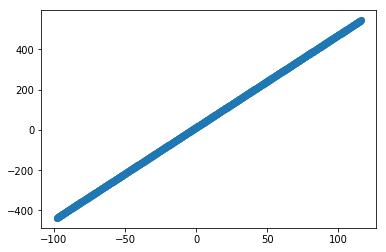

In [163]:
#Let's create our own data frame and build a linear rwgression model from scratch on it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame({"Number_of_hours_spent_driving":[10,9,2,15,10,16,11,16],"Risk_on_a_scale_0-100":[95,80,10,50,45,98,38,93]})
X=df["Number_of_hours_spent_driving"].values#independent variable
Y=df["Risk_on_a_scale_0-100"].values#dependent variable

#Now we will work on getting the coefficients i.e beta 1 abd beta 0
#Y=beta0+beta1(X)
#beta1=∑ (xi-ˉx)(yi-ˉy)/∑(xi-ˉx)**2
#beta0=[ˉy - (beta1)ˉx]
#first we will caluate the mean of X and Y
xmean=statistics.mean(X)
ymean=statistics.mean(Y)
m=len(X)
numerator=0
denominator=0
for i in range(m):
    numerator+=(X[i]-xmean)*(Y[i]-ymean)
    denominator+=(X[i]-xmean)**2
beta1=numerator/denominator
beta0=ymean-(beta1)*xmean
print(beta0,beta1)
#Risk_on_a_scale_0-100=12.59+(4.58)Number_of_hours_spent_driving
#now you get your regression line equation


#LETS PLOT OUR REGRESSION LINE
xmax=np.max(X)+100
xmin=np.min(X)-100
x=np.linspace(xmin,xmax,1000)
y=beta0+beta1*x
plt.scatter(x,y)
#This model is not so bad, but we need to find how good is our model. There are many methods to evaluate models. We will use Root Mean Squared Error and coeffif=cient of Determination(RSquare)
#RMSE=(∑((^yi-y)**2)/m)**(1/2)
#^yi is the ith predicted output values
#Now let's calculate RMSE
rmse=0
for i in range(0,m):
    y_pred=beta0+beta1*X[i]#predicted line equation
    rmse+=(Y[i]-y_pred)**2
rmse=np.sqrt(rmse/m)
#now we will find R**2
#SSt is the total sum of squares=∑(yi-ˉy)**2
#SSe is the total sum of squared errors=∑(yi-^yi)**2
#R**2=1-(SSt/SSe)
#RSquare ranges from 0 to 1
sst=0
sse=0
for i in range(0,m):
    y_pred=beta0+beta1*(X[i])
    sst+=(Y[i]-ymean)**2
    sse+=(Y[i]-y_pred)**2
Rsquare=1-(sst/sse)
Rsquare

